In [9]:
pip install tensorflow keras opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2 as cv
import os
import pandas as pd

The code below requires that the rice images be in seperate folders in one directory that is in the same directory as the notebook. i.e.

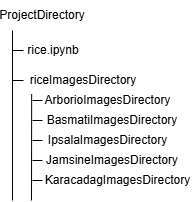

In [7]:
base_path = "rice_omages"

data = []
counter = 0
for label in os.listdir(base_path):
    folder_path = os.path.join(base_path, label)
    
    if os.path.isdir(folder_path):
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
             
            image = cv.imread(image_path)
                
            if image is not None:
                data.append((image, label))

df = pd.DataFrame(data, columns=["image", "label"])

print(df.head())

                                               image    label
0  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  Arborio
1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  Arborio
2  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  Arborio
3  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  Arborio
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  Arborio


In [8]:
df.dtypes

image    object
label    object
dtype: object

In [10]:
df.head(40)

,image,label
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Arborio
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Arborio
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Arborio
3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Arborio
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Arborio
5,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Arborio
6,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Arborio
7,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Arborio
8,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Arborio
9,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Arborio
